In [1]:
# Install BiocManager if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Install MOFA2 package from Bioconductor
BiocManager::install("MOFA2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.22 (BiocManager 1.30.27), R 4.5.2 (2025-10-31)

Installing package(s) 'BiocVersion', 'MOFA2'

also installing the dependencies ‘matrixStats’, ‘XVector’, ‘abind’, ‘RcppEigen’, ‘BH’, ‘sitmo’, ‘filelock’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘plyr’, ‘RcppTOML’, ‘here’, ‘png’, ‘SparseArray’, ‘h5mread’, ‘BiocGenerics’, ‘S4Vectors’, ‘IRanges’, ‘S4Arrays’, ‘MatrixGenerics’, ‘FNN’, ‘irlba’, ‘RcppAnnoy’, ‘RSpectra’, ‘dqrng’, ‘RcppProgress’, ‘dir.expiry’, ‘rhdf5’, ‘reshape2’, ‘pheatmap’, ‘cowplot’, ‘ggrepel’, ‘reticulate’, ‘HDF5Array’, ‘corrplot’, ‘DelayedArray’, ‘Rtsne’, ‘uwot’, ‘basilisk’




In [2]:
# Load required libraries
library(ggplot2)  # For data visualization
library(MOFA2)    # For MOFA analysis and plotting functions
library(dplyr)    # For data manipulation


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Load the trained MOFA model (ungrouped analysis)
CCLE_no_groups <- load_model("/content/CLLE_no_groups.hdf5")

In [4]:
# Load DepMap metadata for all cell lines
metadata_no_filter <- read.csv('/content/Metada_DepMap Public 25Q2.csv')

# Load list of pancreatic cancer cell lines from RNA profile
pancreatic_cell_lines <- read.csv("/content/pancreas_CCLE_RNA_profile.csv")

# Filter metadata to include only pancreatic cancer cell lines
metada <- metadata_no_filter[metadata_no_filter$StrippedCellLineName %in% pancreatic_cell_lines$depmap_id, ]

In [5]:
# Sort metadata to match the sample order in the MOFA model
metadata <- metadata_no_filter[metadata_no_filter$StrippedCellLineName %in% samples_names(CCLE_no_groups)[[1]], ]

In [6]:
# Create metadata dataframe with relevant clinical variables
metada_for_graph <- data.frame(
  sample = metada$StrippedCellLineName,
  stage = metada$PrimaryOrMetastasis,
  age = metada$Age,
  sex = metada$Sex,
  race = metada$PatientRace,
  collection_site = metada$SampleCollectionSite,
  oncotreecode = metada$OncotreeCode,
  oncotreeSubtype = metada$OncotreeSubtype
)

In [7]:
# Add metadata to the MOFA model object
samples_metadata(CCLE_no_groups) <- metada_for_graph

In [8]:
# Inspect variance explained by each factor for RNA and Protein views
head(CCLE_no_groups@cache$variance_explained$r2_per_factor[[1]])

,RNA,Protein
Factor1,11.884875501,3.476855
Factor2,0.004461283,8.946189
Factor3,6.831478963,1.307663


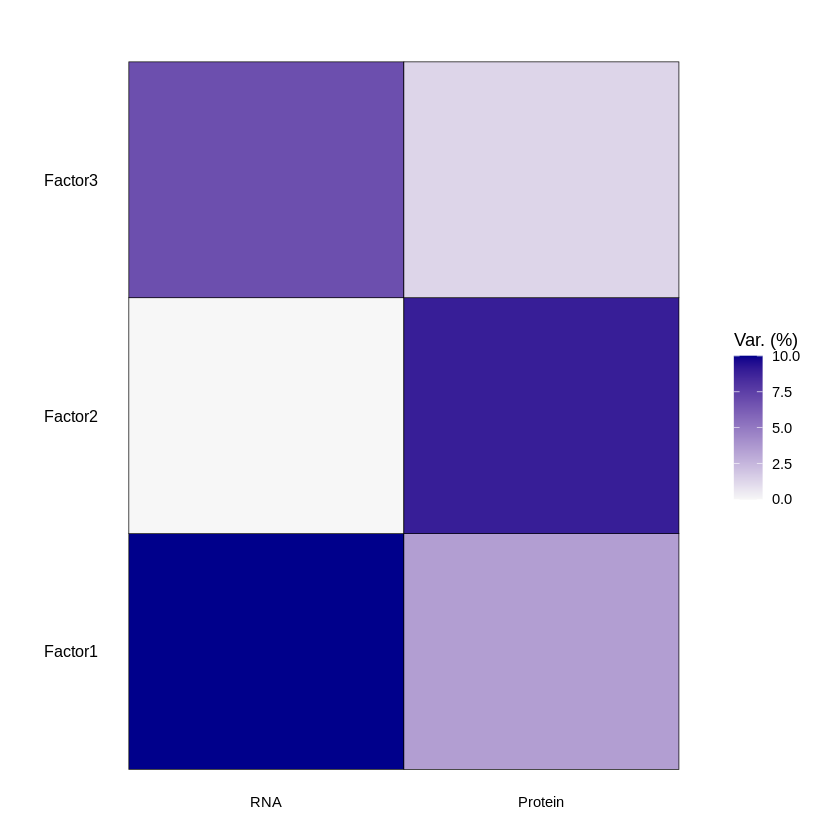

In [9]:
# Plot variance explained by each factor across views
plot_variance_explained(CCLE_no_groups, max_r2 = 10)

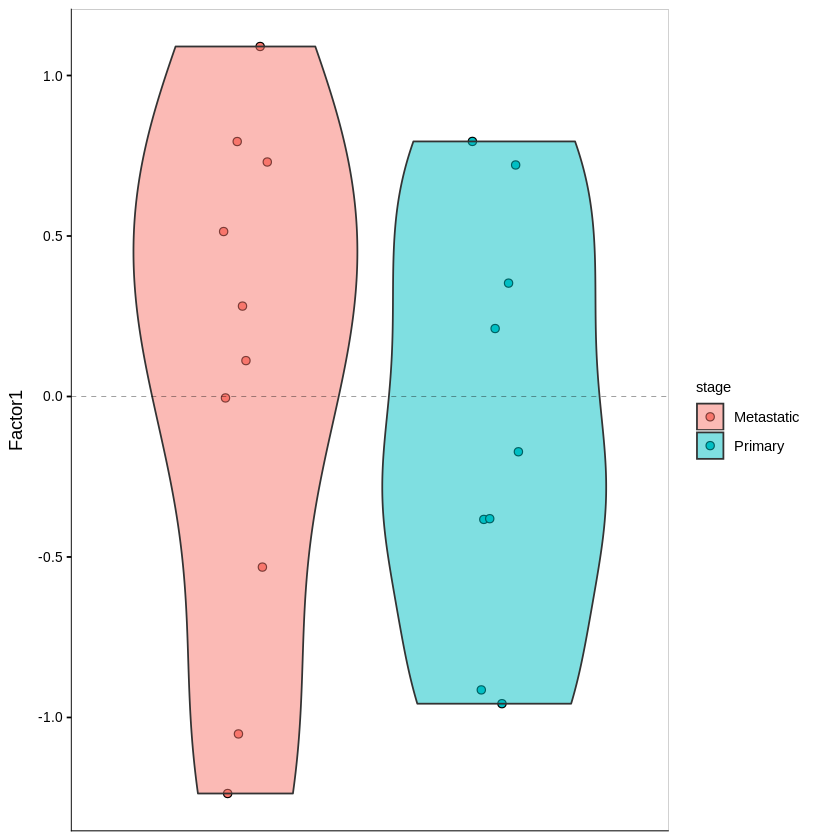

In [10]:
# Plot Factor 1 values stratified by disease stage
plot_factor(CCLE_no_groups,
  factors = 1,
  color_by = "stage",
  add_violin = TRUE,
  dodge = TRUE
)

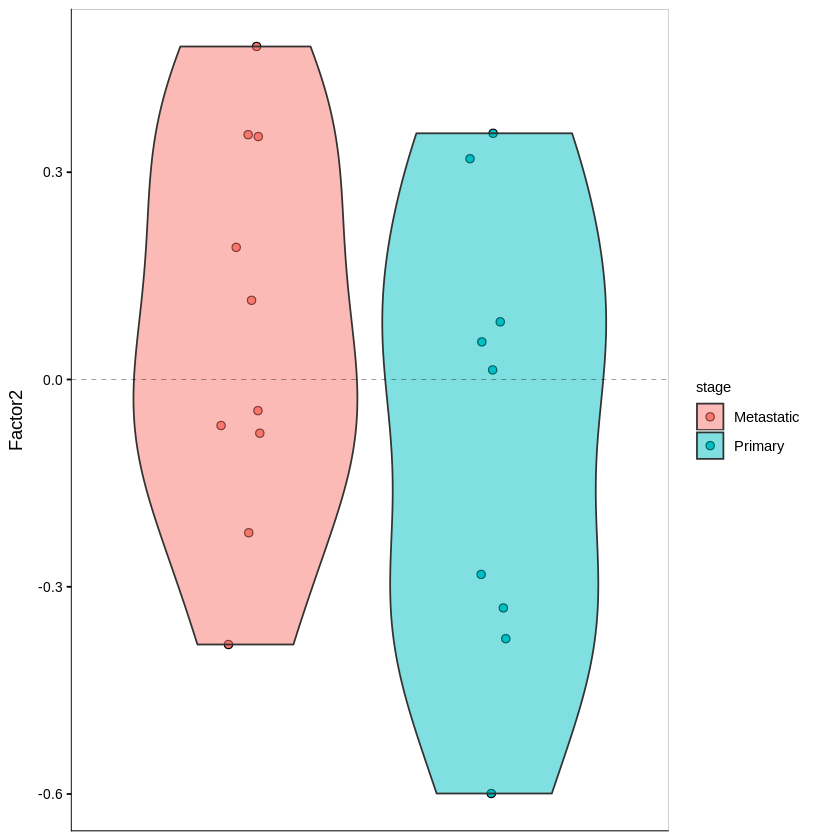

In [11]:
# Plot Factor 2 values stratified by disease stage
plot_factor(CCLE_no_groups,
  factors = 2,
  color_by = "stage",
  add_violin = TRUE,
  dodge = TRUE
)

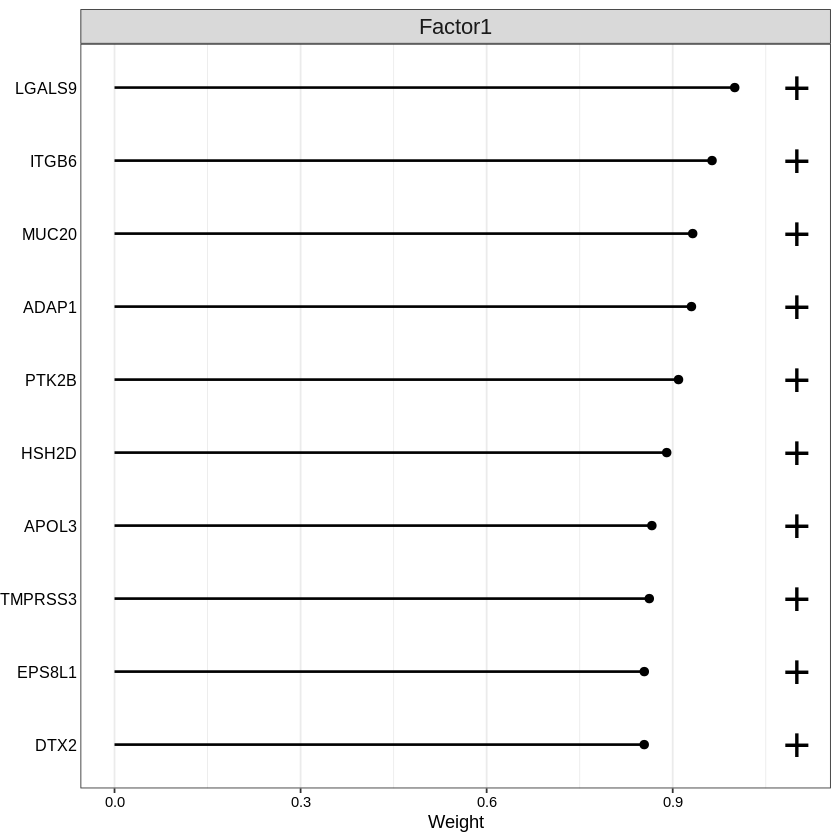

In [12]:
# Plot top 10 genes with highest weights in Factor 1 (RNA view)
plot_top_weights(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  nfeatures = 10,     # Number of top features to display
  scale = TRUE        # Scale weights from -1 to 1
)

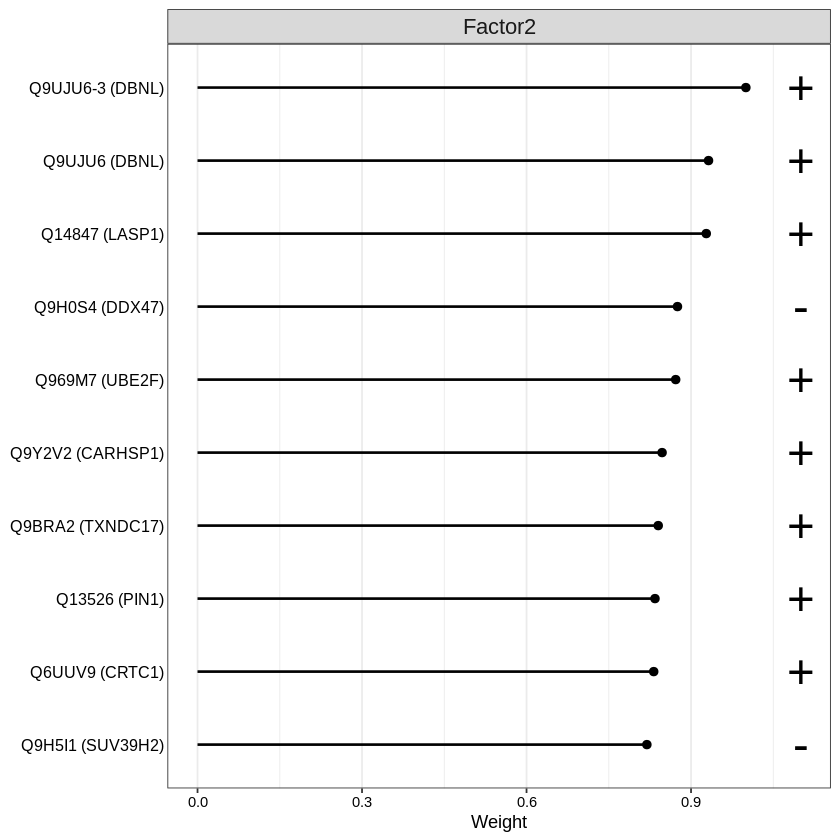

In [13]:
# Plot top 10 proteins with highest weights in Factor 2 (Protein view)
plot_top_weights(CCLE_no_groups,
  view = "Protein",
  factor = 2,
  nfeatures = 10,     # Number of top features to display
  scale = TRUE        # Scale weights from -1 to 1
)

In [14]:
# Install ggpubr package for enhanced visualization
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/ggpubr")

Loading required package: devtools

Loading required package: usethis




TTR          (NA -> 0.24.4    ) [CRAN]
xts          (NA -> 0.14.1    ) [CRAN]
quantmod     (NA -> 0.4.28    ) [CRAN]
quadprog     (NA -> 1.5-8     ) [CRAN]
RcppArmad... (NA -> 15.2.2-1  ) [CRAN]
zoo          (NA -> 1.8-14    ) [CRAN]
urca         (NA -> 1.3-4     ) [CRAN]
tseries      (NA -> 0.10-58   ) [CRAN]
timeDate     (NA -> 4051.111  ) [CRAN]
lmtest       (NA -> 0.9-40    ) [CRAN]
fracdiff     (NA -> 1.5-3     ) [CRAN]
colorspace   (NA -> 2.1-2     ) [CRAN]
rbibutils    (NA -> 2.4       ) [CRAN]
microbenc... (NA -> 1.5.0     ) [CRAN]
forecast     (NA -> 8.24.0    ) [CRAN]
Deriv        (NA -> 4.2.0     ) [CRAN]
MatrixModels (NA -> 0.5-4     ) [CRAN]
SparseM      (NA -> 1.84-2    ) [CRAN]
doBy         (NA -> 4.7.1     ) [CRAN]
numDeriv     (NA -> 2016.8-1.1) [CRAN]
Rdpack       (NA -> 2.6.4     ) [CRAN]
reformulas   (NA -> 0.4.2     ) [CRAN]
nloptr       (NA -> 2.2.1     ) [CRAN]
minqa        (NA -> 1.2.8     ) [CRAN]
lme4         (NA -> 1.1-38    ) [CRAN]
quantreg     (NA -> 6.1  

Installing 35 packages: TTR, xts, quantmod, quadprog, RcppArmadillo, zoo, urca, tseries, timeDate, lmtest, fracdiff, colorspace, rbibutils, microbenchmark, forecast, Deriv, MatrixModels, SparseM, doBy, numDeriv, Rdpack, reformulas, nloptr, minqa, lme4, quantreg, pbkrtest, Formula, carData, car, rstatix, polynom, gridExtra, ggsignif, ggsci

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpzqP6ep/remotes3511d712cf8/kassambara-ggpubr-9abb17b/DESCRIPTION’ ... OK
* preparing ‘ggpubr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘ggpubr_0.6.2.999.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



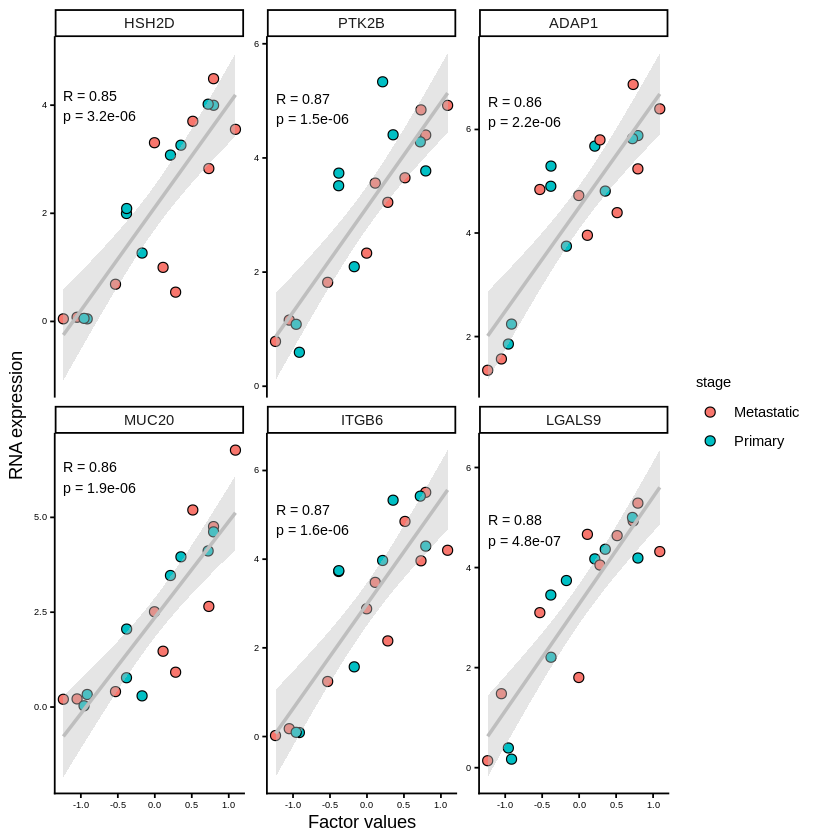

In [15]:
# Scatter plot: Factor 1 values vs. expression of top 6 positively weighted genes
plot_data_scatter(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  features = 6,
  sign = "positive",
  color_by = "stage"
) + labs(y = "RNA expression")

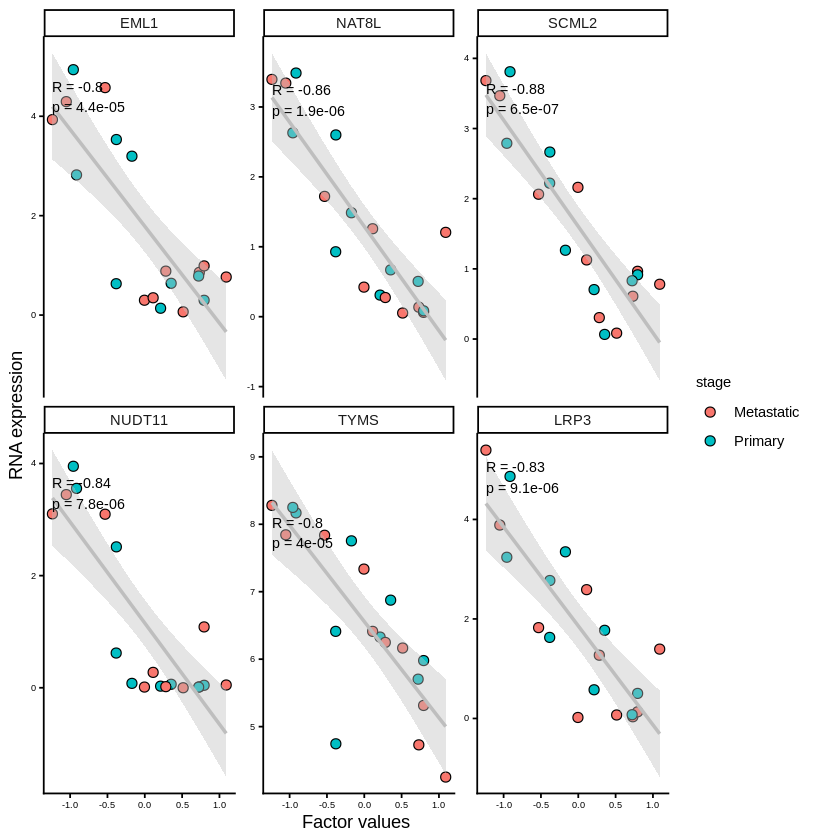

In [16]:
# Scatter plot: Factor 1 values vs. expression of top 6 negatively weighted genes
plot_data_scatter(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  features = 6,
  sign = "negative",
  color_by = "stage"
) + labs(y = "RNA expression")

In [17]:
# Create annotation dataframe for heatmap visualization
annotation <- data.frame(
  age = metada_for_graph$age,
  sex = metada_for_graph$sex,
  stage = metada_for_graph$stage
)
rownames(annotation) <- metada_for_graph$sample

'annotation_samples' provided as a data.frame, please make sure that the rownames match the sample names



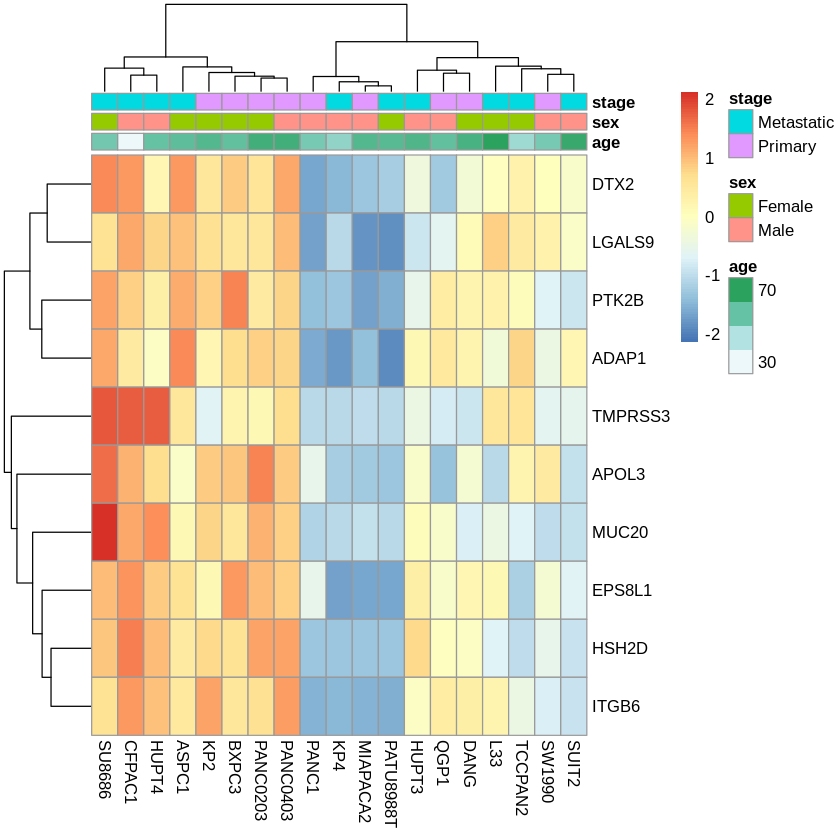

In [18]:
# Heatmap of top 10 RNA features for Factor 1 with clinical annotations
plot_data_heatmap(CCLE_no_groups,
  view = "RNA",
  factor = 1,
  features = 10,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  show_rownames = TRUE,
  show_colnames = TRUE,
  scale = "row",
  annotation_samples = annotation
)

'annotation_samples' provided as a data.frame, please make sure that the rownames match the sample names



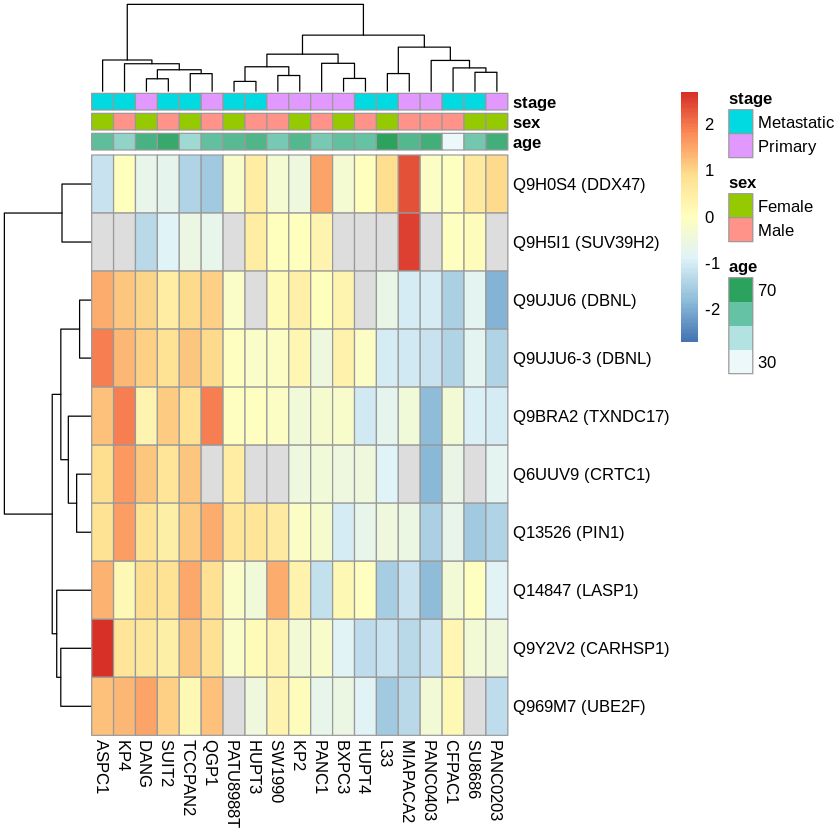

In [19]:
# Heatmap of top 10 protein features for Factor 2 with clinical annotations
plot_data_heatmap(CCLE_no_groups,
  view = "Protein",
  factor = 2,
  features = 10,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  show_rownames = TRUE,
  show_colnames = TRUE,
  scale = "row",
  annotation_samples = annotation
)